In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("water_potability.csv")

In [3]:
df.head(100)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
95,6.140878,197.876090,26687.874483,7.587196,329.231853,548.072761,15.836330,41.263648,5.359460,0
96,7.077874,220.670540,23873.378210,6.181840,341.987234,333.050786,10.661799,90.297770,4.764508,0
97,5.488314,135.802362,21485.153195,8.187416,280.603287,441.331137,14.860263,88.287346,5.066786,0
98,7.205559,120.327615,24627.867560,6.202469,289.768697,418.433290,13.643147,63.733732,3.710053,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.shape

(3276, 10)

In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3271    False
3272    False
3273    False
3274    False
3275    False
Length: 3276, dtype: bool

In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

<Axes: xlabel='Potability', ylabel='count'>

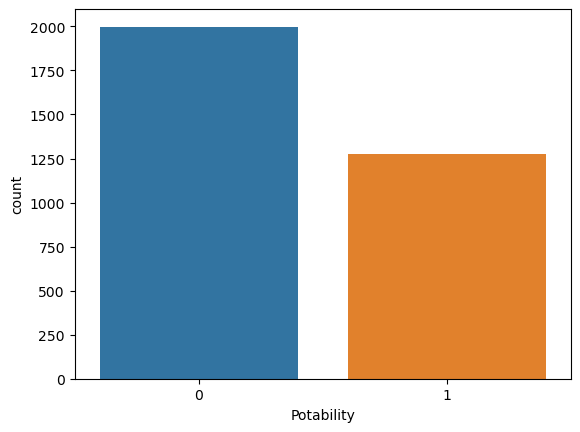

In [11]:
sns.countplot(data=df,x='Potability')

<Axes: xlabel='ph', ylabel='Density'>

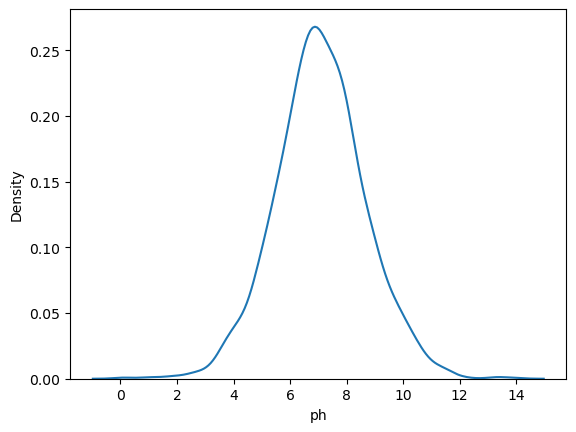

In [12]:
sns.distplot(df['ph'],hist=False)

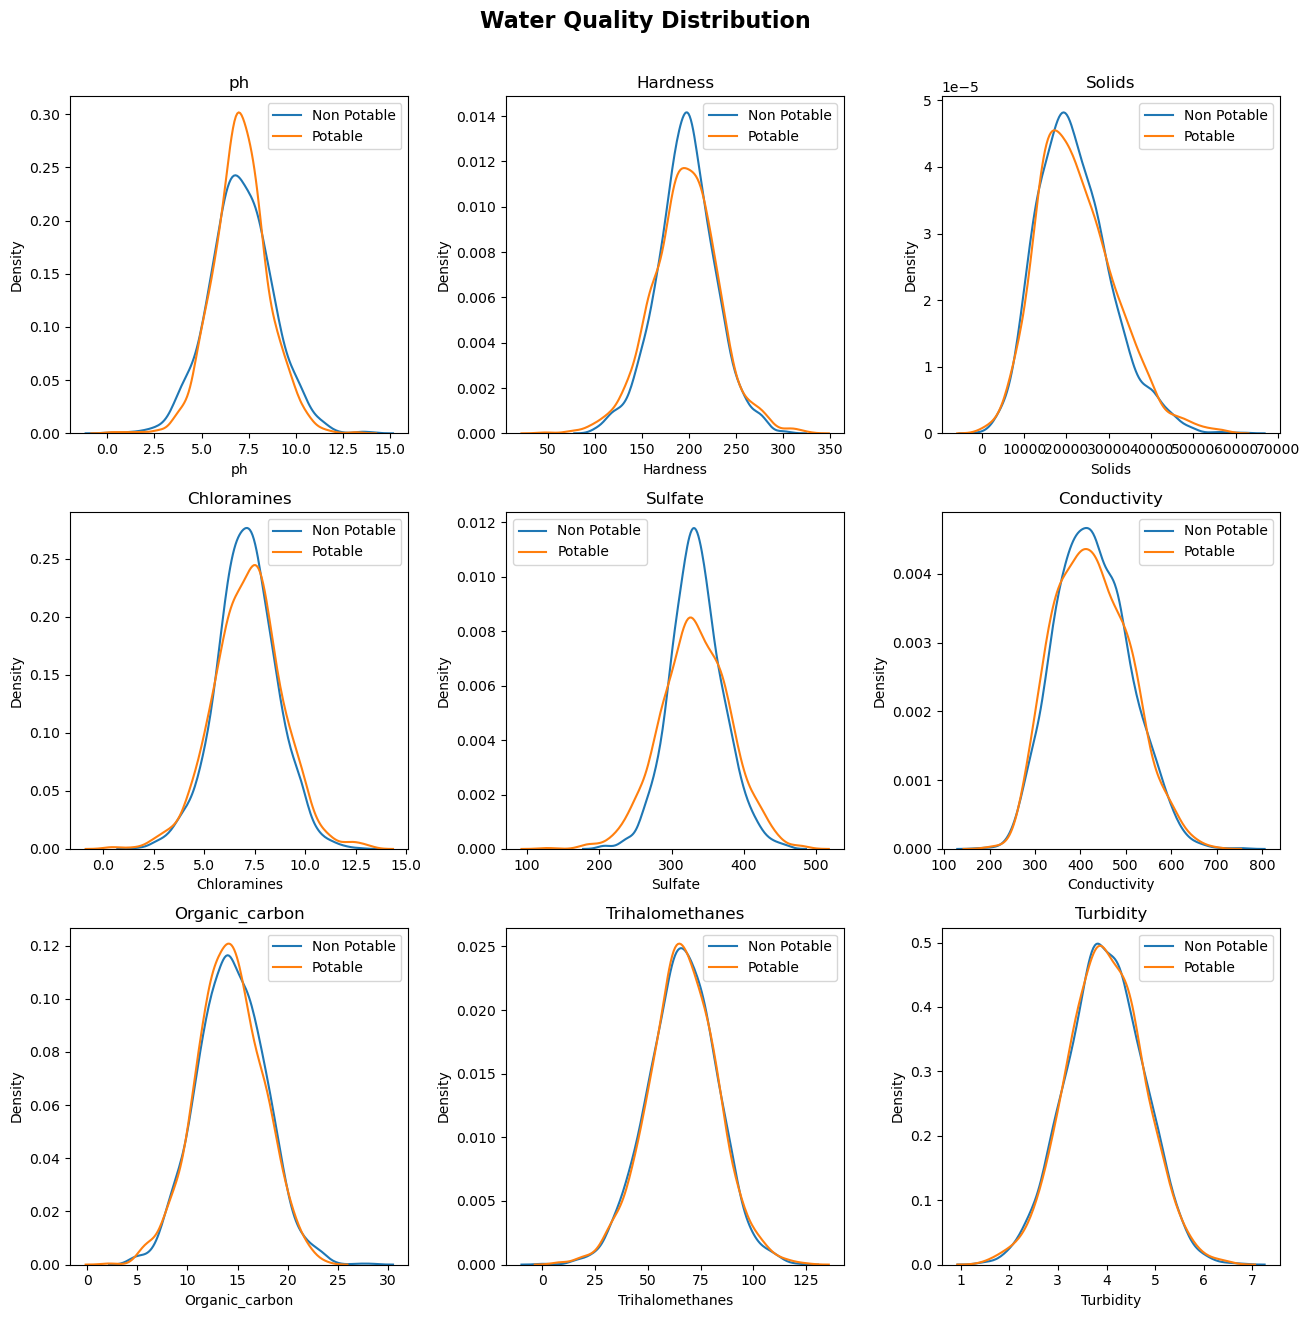

In [13]:
non_potable=df[df['Potability'] ==0]
potable=df[df['Potability'] ==1]

plt.figure(figsize=(13,13))

for ax,col in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col],label="Non Potable")
    sns.kdeplot(x=potable[col],label='Potable')
    plt.legend()

plt.suptitle('Water Quality Distribution',y=1.01,size=16,color='black',weight='bold')
plt.tight_layout()

In [14]:
df.drop('Potability',axis=1).skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

In [15]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [16]:
df.corr().abs()['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Organic_carbon     0.030001
Chloramines        0.023779
Sulfate            0.023577
Hardness           0.013837
Conductivity       0.008128
Trihalomethanes    0.007130
ph                 0.003556
Turbidity          0.001581
Name: Potability, dtype: float64

Text(0.5, 1.01, 'Water Quality Box-Plot')

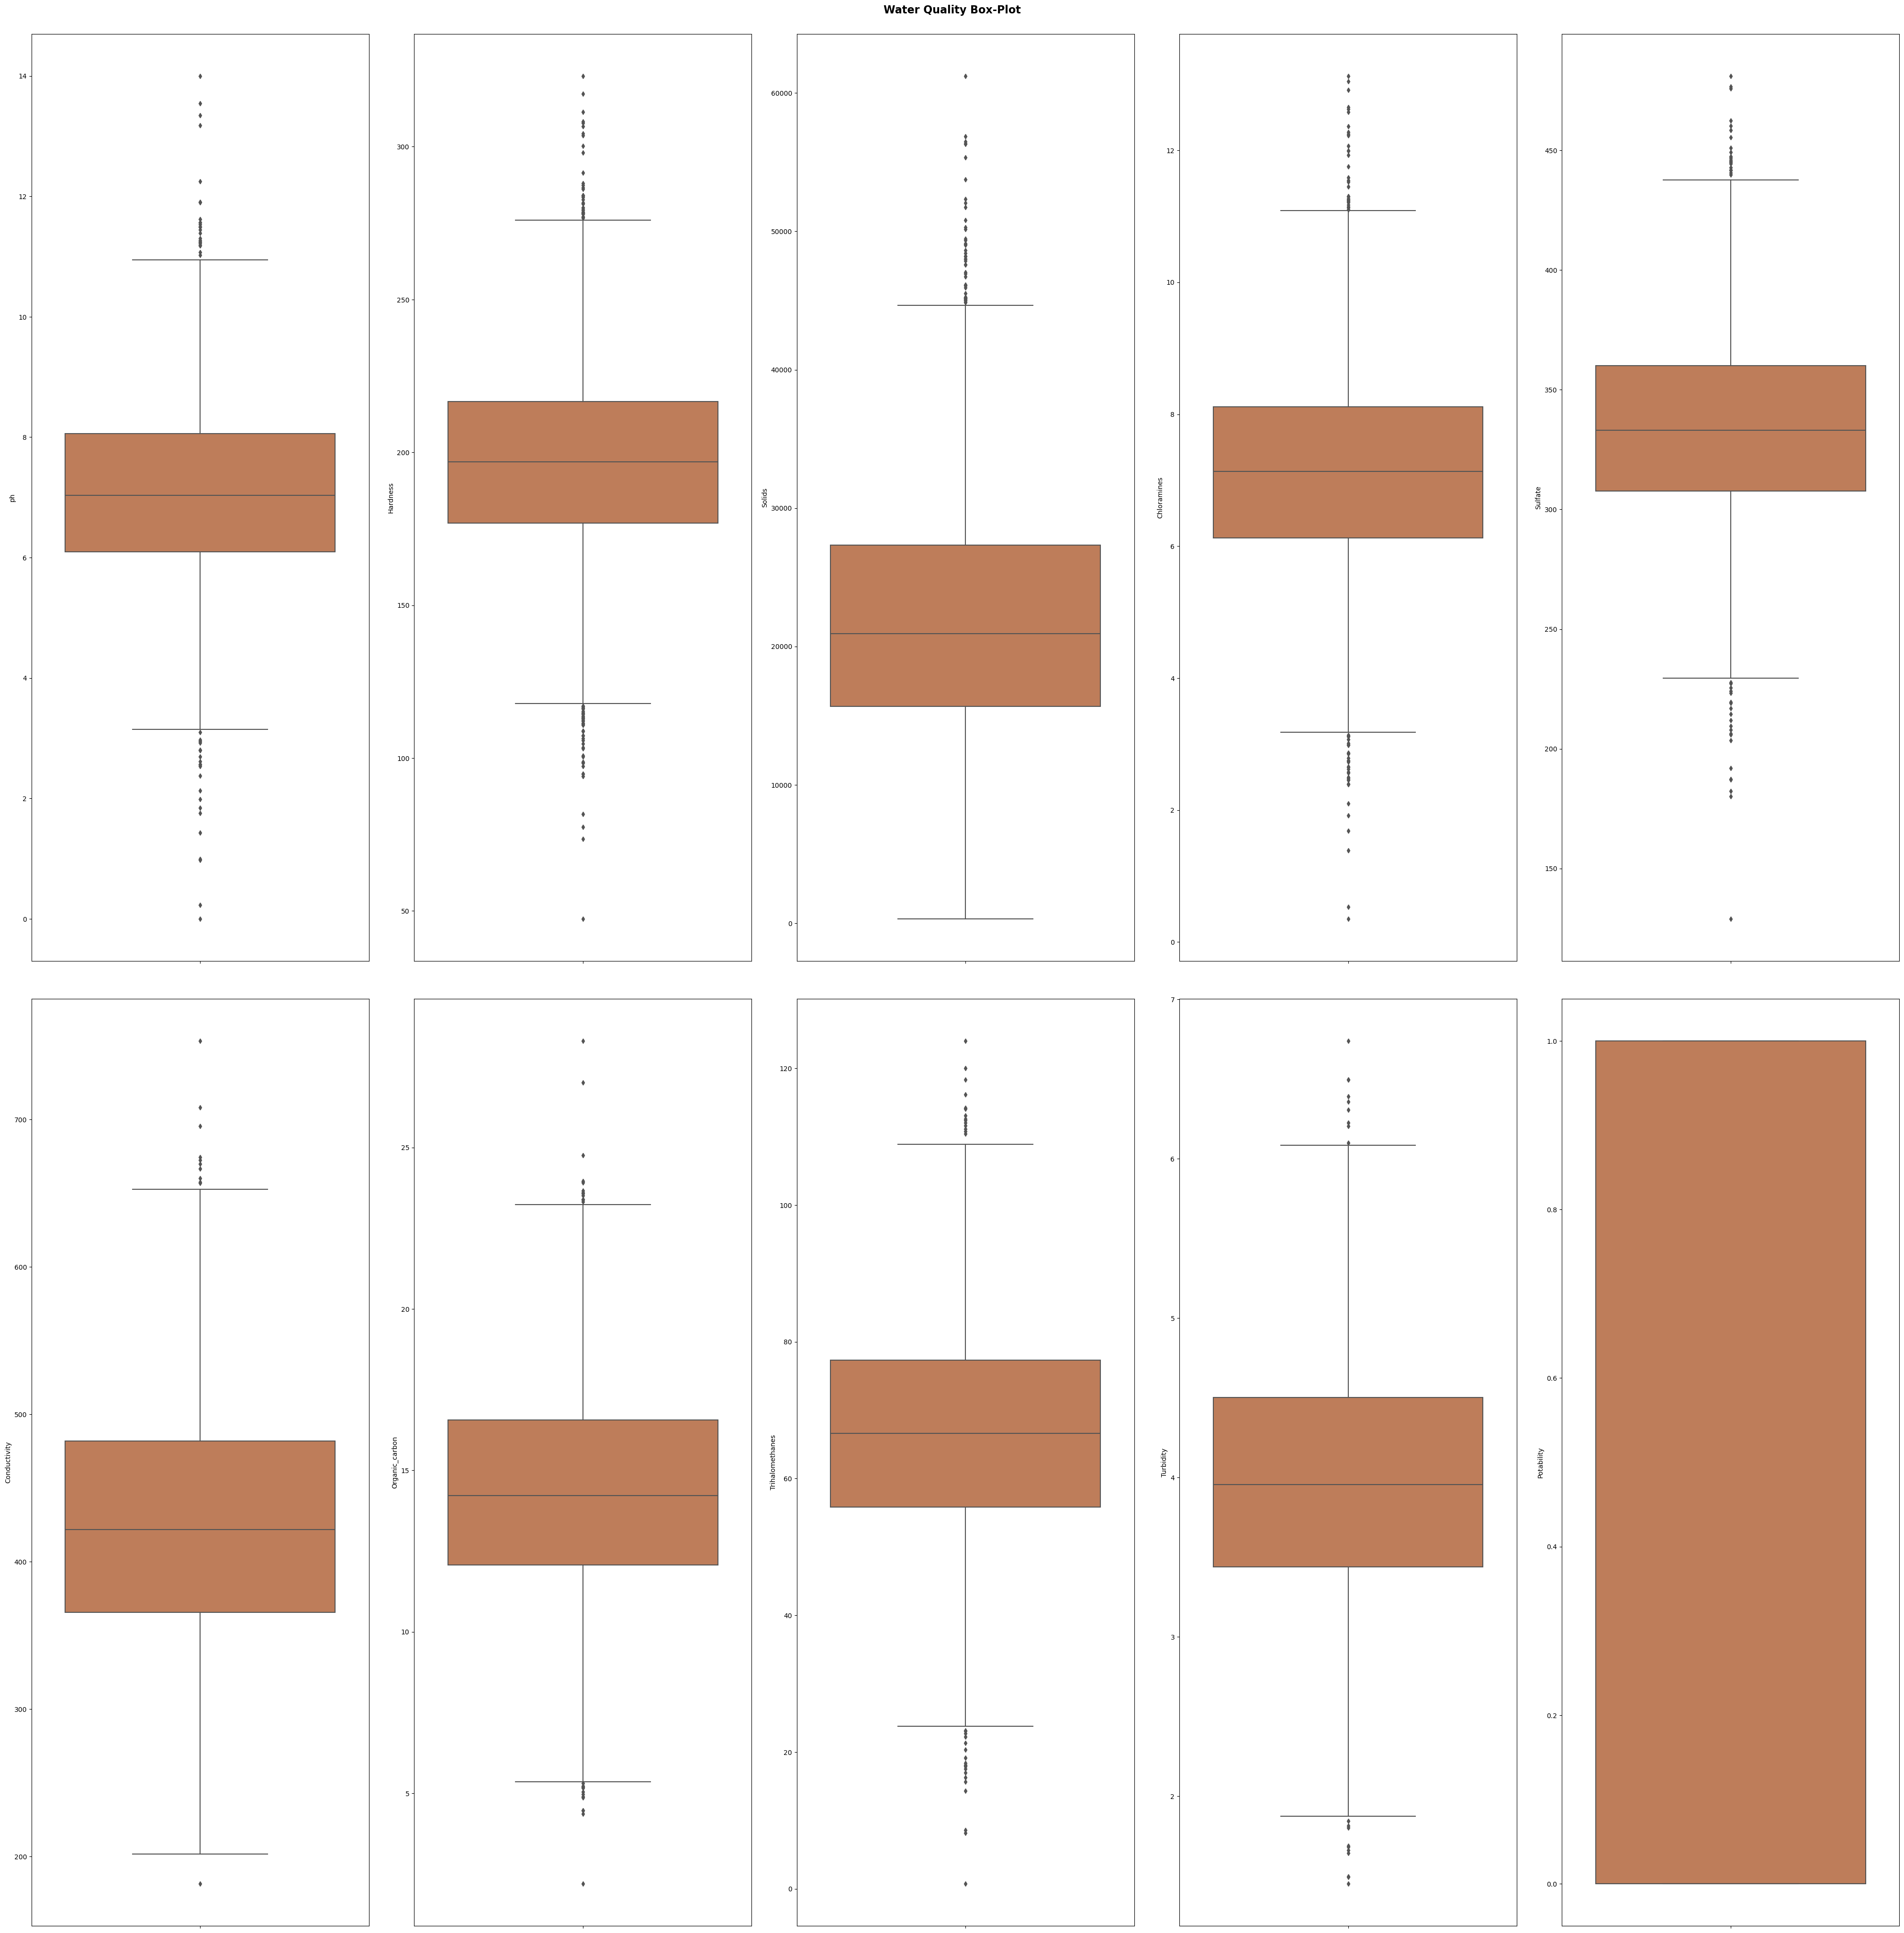

In [17]:
fig,ax=plt.subplots(ncols=5 ,nrows=2,figsize=(40,40))
index=0
ax=ax.flatten()

for attributeCol, value in df.items():
    sns.boxplot(y=attributeCol, data=df, ax=ax[index],color="#cf7849")
    index +=1
plt.tight_layout(pad=1.5 ,w_pad=1.5 ,h_pad=5.0)

plt.suptitle("Water Quality Box-Plot",y=1.01,size=16,color='black',weight='bold')

In [18]:
df.isna().any().any()

True

In [19]:
df.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

Text(0.5, 1.0, 'Missing Data in Percentage')

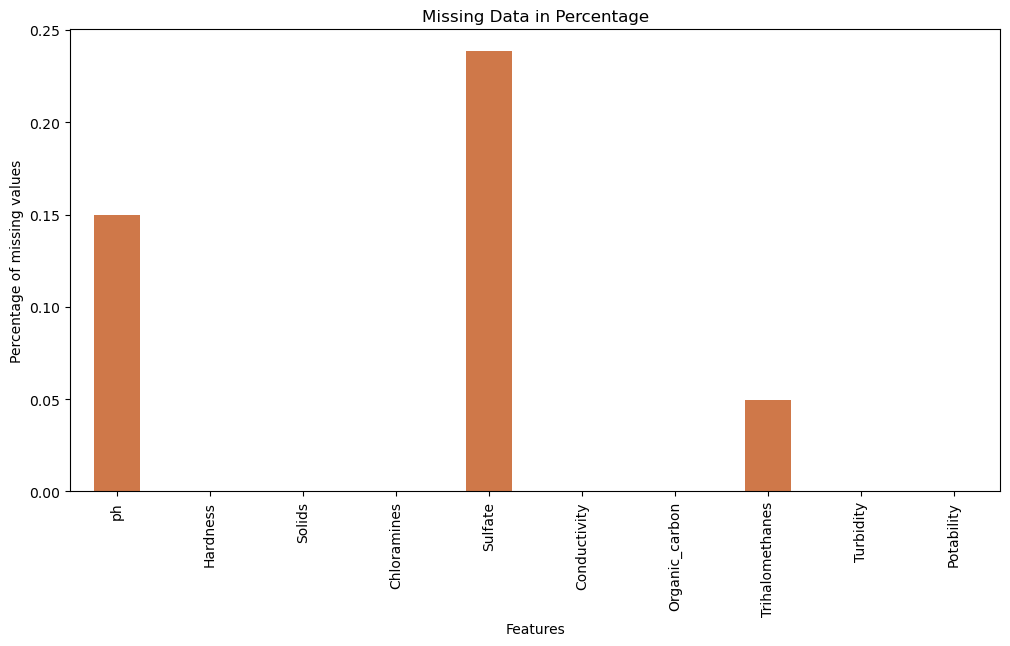

In [20]:
df.isnull().mean().plot.bar(figsize=(12,6),color='#cf7849')
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Missing Data in Percentage')

In [21]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64

In [22]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].mean()

ph                   7.073783
Sulfate            332.566990
Trihalomethanes     66.539684
dtype: float64

In [23]:
df1=df.copy()

In [24]:
df1['ph'].fillna(value=df1['ph'].mean(),inplace=True)
df1['Sulfate'].fillna(value=df1['Sulfate'].mean(),inplace=True)
df1['Trihalomethanes'].fillna(value=df1['Trihalomethanes'].mean(),inplace=True)

In [25]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [26]:
from scipy import stats
df_water=df1.copy()
df_water=df_water[(np.abs(stats.zscore(df1))<=3).all(axis=1)]

In [27]:
df_water.shape

(3128, 10)

In [28]:
from sklearn.model_selection import train_test_split

X=df_water.drop('Potability',axis=1)
y=df_water['Potability']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [30]:
print('X_train:',X_train.shape,'\ny_train:',y_train.shape)
print('X_test:',X_test.shape,'\ny_test:',y_test.shape)

X_train: (2502, 9) 
y_train: (2502,)
X_test: (626, 9) 
y_test: (626,)


In [31]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [32]:
LogReg=LogisticRegression()
LogReg.fit(X_train,y_train)
LogReg_pred=LogReg.predict(X_test)

In [33]:
print(classification_report(LogReg_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77       626
           1       0.00      0.00      0.00         0

    accuracy                           0.63       626
   macro avg       0.50      0.31      0.39       626
weighted avg       1.00      0.63      0.77       626



In [34]:
df_water.Potability.value_counts()

Potability
0    1930
1    1198
Name: count, dtype: int64

In [35]:
DecTree=DecisionTreeClassifier()
DecTree.fit(X_train,y_train)
DecTree_pred=DecTree.predict(X_test)
print(classification_report(DecTree_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       388
           1       0.47      0.45      0.46       238

    accuracy                           0.59       626
   macro avg       0.57      0.57      0.57       626
weighted avg       0.59      0.59      0.59       626



In [36]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
dt=DecisionTreeClassifier()

In [37]:
para_dt={'criterion':['gini','entropy'],'max_depth':np.arange(1,50),'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}

grid_dt=GridSearchCV(dt,param_grid=para_dt,cv=5)

grid_dt.fit(X_train,y_train)

print('Best parameters for Ddecision Tree:', grid_dt.best_params_)

Best parameters for Ddecision Tree: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4}


In [38]:
dt1=DecisionTreeClassifier(criterion='gini', max_depth=11, min_samples_leaf=4)

In [39]:
dt1.fit(X_train,y_train)
y_pred=dt1.predict(X_test)

In [40]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74       498
           1       0.28      0.50      0.36       128

    accuracy                           0.63       626
   macro avg       0.56      0.58      0.55       626
weighted avg       0.72      0.63      0.66       626



In [41]:
print(confusion_matrix(y_pred,y_test))

[[330 168]
 [ 64  64]]
